<a href="https://colab.research.google.com/github/vikasstudy/deep-learning-keras-tf-tutorial/blob/master/housing_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [11]:
df=pd.read_csv('loan_data_test.csv')
df.shape

(36603, 122)

In [3]:
#Check for null values in the dataset
df1= df.isnull().count()
df1.head(2000)

#df.columns[df.isnull().any()]


SK_ID_CURR                    36603
TARGET                        36603
NAME_CONTRACT_TYPE            36603
CODE_GENDER                   36603
FLAG_OWN_CAR                  36603
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     36603
AMT_REQ_CREDIT_BUREAU_WEEK    36603
AMT_REQ_CREDIT_BUREAU_MON     36603
AMT_REQ_CREDIT_BUREAU_QRT     36603
AMT_REQ_CREDIT_BUREAU_YEAR    36603
Length: 122, dtype: int64

In [4]:
df.isna().any(axis=1)


0        True
1        True
2        True
3        True
4        True
         ... 
36598    True
36599    True
36600    True
36601    True
36602    True
Length: 36603, dtype: bool

In [5]:
# Print percentage of default to payer of the dataset for the TARGET column

defaulters=(df.TARGET==1).sum()
print(defaulters)
payers=(df.TARGET==0).sum()
print(payers)
print((defaulters/payers)*100)

2944
33658
8.74680610850318


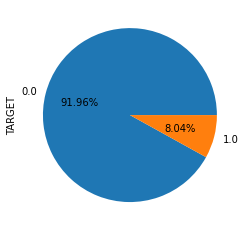

In [6]:
#Plot the balanced data or imbalanced data
df.TARGET.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [7]:
#Balance the dataset if the data is imbalanced
df['TARGET'].value_counts()
df_defaulters=df[df.TARGET==1]
df_payers=df[df.TARGET==0]

defaulters_count=df_defaulters['TARGET'].count()
print(defaulters_count)
payers_count=df_payers['TARGET'].count()
print(payers_count)

defaulters = df_defaulters.sample(payers_count,replace=True)

bal_df = pd.concat([defaulters,df_payers])
bal_df.shape


2944
33658


(67316, 122)

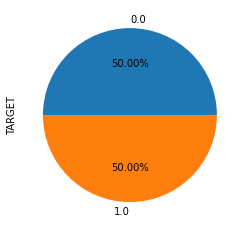

In [8]:
#Plot the balanced data or imbalanced data
bal_df.TARGET.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [9]:
#Encode the columns that is required for the model
df_null_rmv = bal_df.copy()
print(bal_df.shape)


mod_df= df_null_rmv.isnull().sum().sort_values(ascending = False)
print(df_null_rmv.shape)
null_cols = []
#there is no meaning to keep more null column , so if any column has more then 10% of null columns we will remove it .
for index, value  in mod_df.items():
     if value > 3600:
        del df_null_rmv[index]
        null_cols.append(index)
     else:
        break
print(df_null_rmv.shape)
print(null_cols)

#it cleary shows that half of the column got removed due to high number of null data .


(67316, 122)
(67316, 122)
(67316, 65)
['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'EXT_SOURCE_1', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 

In [158]:
# all the null and nonunique columns has dropped .
df_null_rmv.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
23174,126962.0,90000.0,377649.0,18495.0,265500.0,0.003069,-18639.0,-1493.0,-4152.0,-2188.0,11.0,Housing,0.474886,1.0,1.0,-1212.0
10685,112446.0,112500.0,481495.5,36130.5,454500.0,0.019101,-12256.0,-318.0,-5718.0,-4869.0,11.0,Business Entity Type 2,0.045082,2.0,2.0,-2033.0
20883,124336.0,81000.0,343377.0,27256.5,283500.0,0.002134,-10557.0,-1002.0,-361.0,-94.0,9.0,Medicine,0.158620,1.0,1.0,-404.0
23034,126805.0,157500.0,497520.0,36184.5,450000.0,0.002506,-16637.0,-1592.0,-2503.0,-184.0,3.0,Business Entity Type 1,0.625796,0.0,0.0,-1228.0
31433,136469.0,117000.0,537669.0,25195.5,378000.0,0.008575,-14498.0,-2079.0,-8292.0,-4752.0,17.0,Medicine,0.629017,4.0,3.0,-470.0


In [23]:
df_null_rmv.head()
inputs = df_null_rmv.drop(['TARGET'],axis=1)
targets = df_null_rmv['TARGET']
print(input.shape,targets.shape)

(67316, 64) (67316,)


In [21]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [27]:
clf=svm.SVC(kernel='linear')
clf=clf.fit(X_train,y_train)


ValueError: ignored